In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('Melbourne_housing.csv')

C:\Users\alexm\AppData\Local\Temp\ipykernel_24224\631711095.py:8: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Melbourne_housing.csv')


Adding imports for graphing and data exploration. Loading in the data using pandas

# Data Loading and Initial Exploration (20 points):


## • Provide information on the dataset, including the number of rows and columns.


In [2]:
data.shape
data.describe

<bound method NDFrame.describe of                  Suburb           Address  Rooms Type Method        SellerG  \
0            Abbotsford     68 Studley St      2    h     SS         Jellis   
1          Airport West     154 Halsey Rd      3    t     PI         Nelson   
2           Albert Park    105 Kerferd Rd      2    h      S  hockingstuart   
3           Albert Park  85 Richardson St      2    h      S        Thomson   
4            Alphington      30 Austin St      3    h     SN        McGrath   
...                 ...               ...    ...  ...    ...            ...   
34852         Reservoir      18 Elinda Pl      3    u     SP             RW   
34853     Roxburgh Park    14 Stainsby Cr      4    h      S          Raine   
34854  Springvale South     8 Bellbird Ct      4    h     PI          Barry   
34855  Springvale South  30 Waddington Cr      3    h      S      Harcourts   
34856       Westmeadows      42 Pascoe St      4    h      S          Barry   

             Date

Answer: 22 Columns, 34,857 rows

## • Briefly describe the target variable (e.g., 'Price') and its distribution.


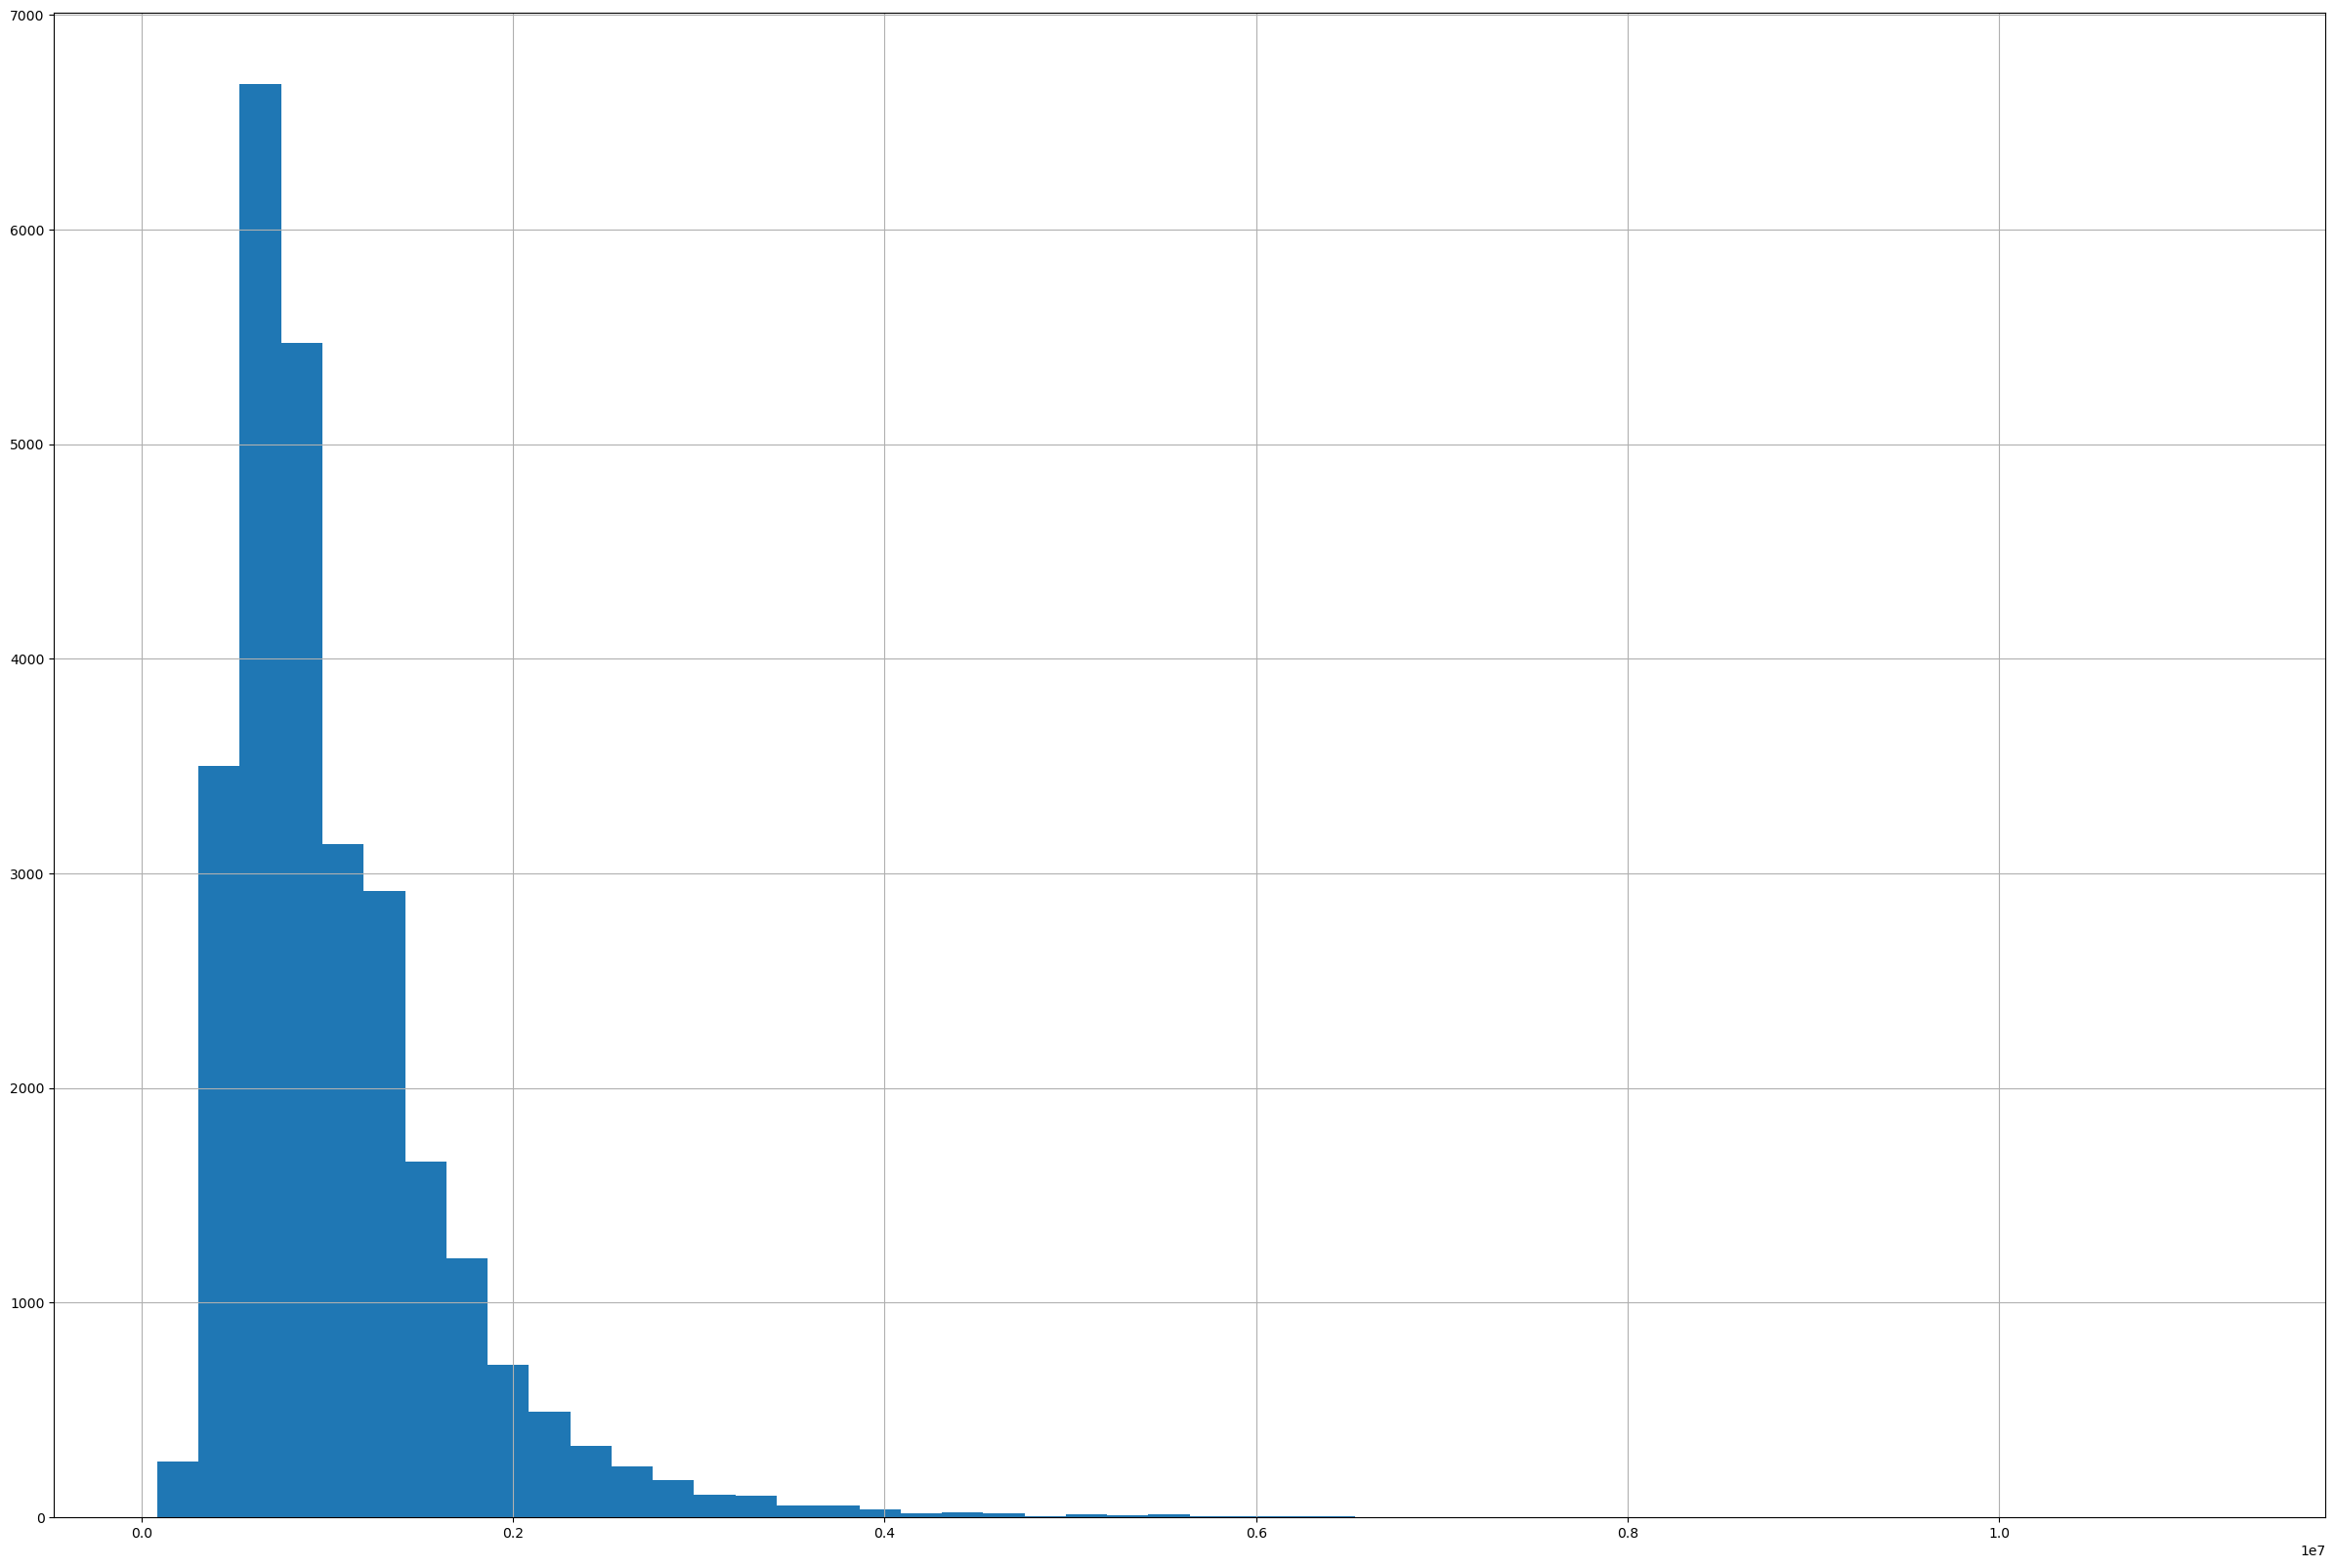

In [3]:
data.Price.describe()
data.Price.hist(bins=50, figsize=(30,20))
plt.show()

Finding information about the Price variable. Here we can see the count, the mean and all the percentiles and the standard deviation. As we can see on the graph, it is left skewed.

## • Display summary statistics and data types of the features.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom        26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13760 non-null  object 
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Latitude       26881 non-null  float64
 17  Longtitude     26881 non-null  float64
 18  Region

## • Identify any missing values and outline a plan to handle them.

In [5]:
#Show sums of NA/NaN
data.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21097
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longtitude        7976
Regionname           0
Propertycount        3
ParkingArea          0
Price             7610
dtype: int64

### One way to handle missing data would be Listwise and pairwise deletion techniques. These techniques discardcases during an analysis if they containmissing data. - Taken from "Out of Sight not out of Mind"

# Exploratory Data Analysis (EDA) (30 points):


## • Visualize the distribution of numeric variables using histograms and box plots.


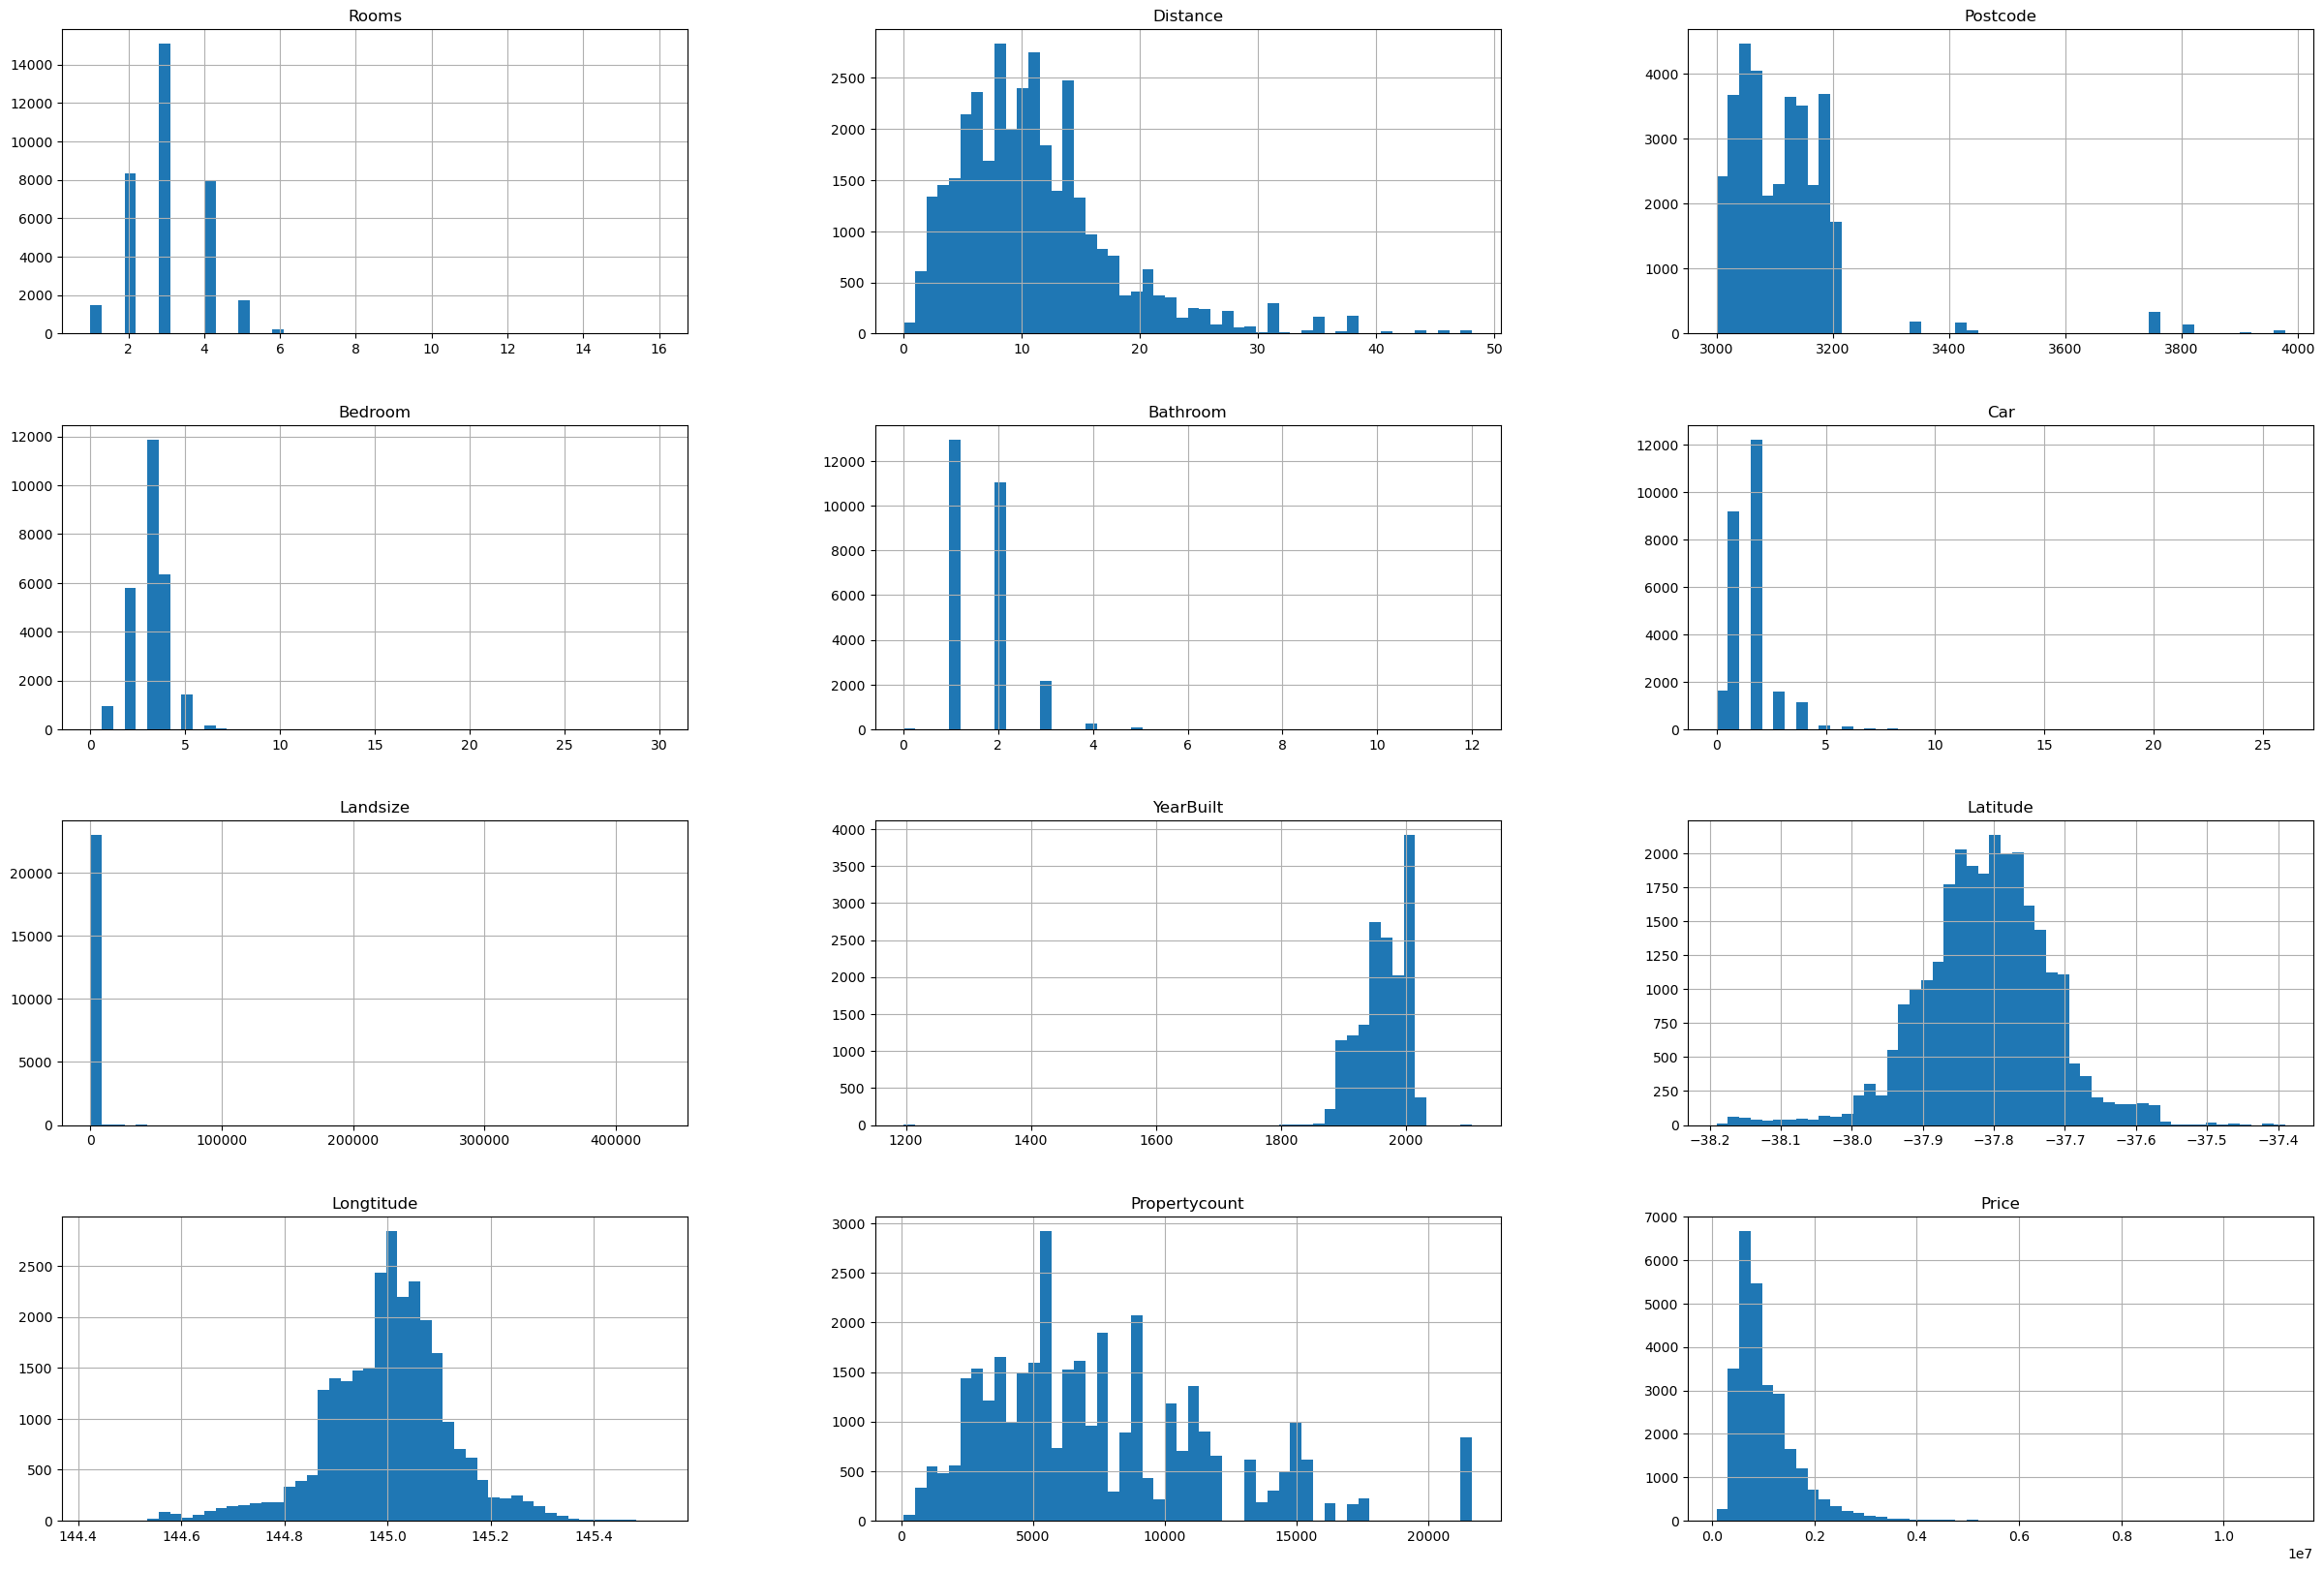

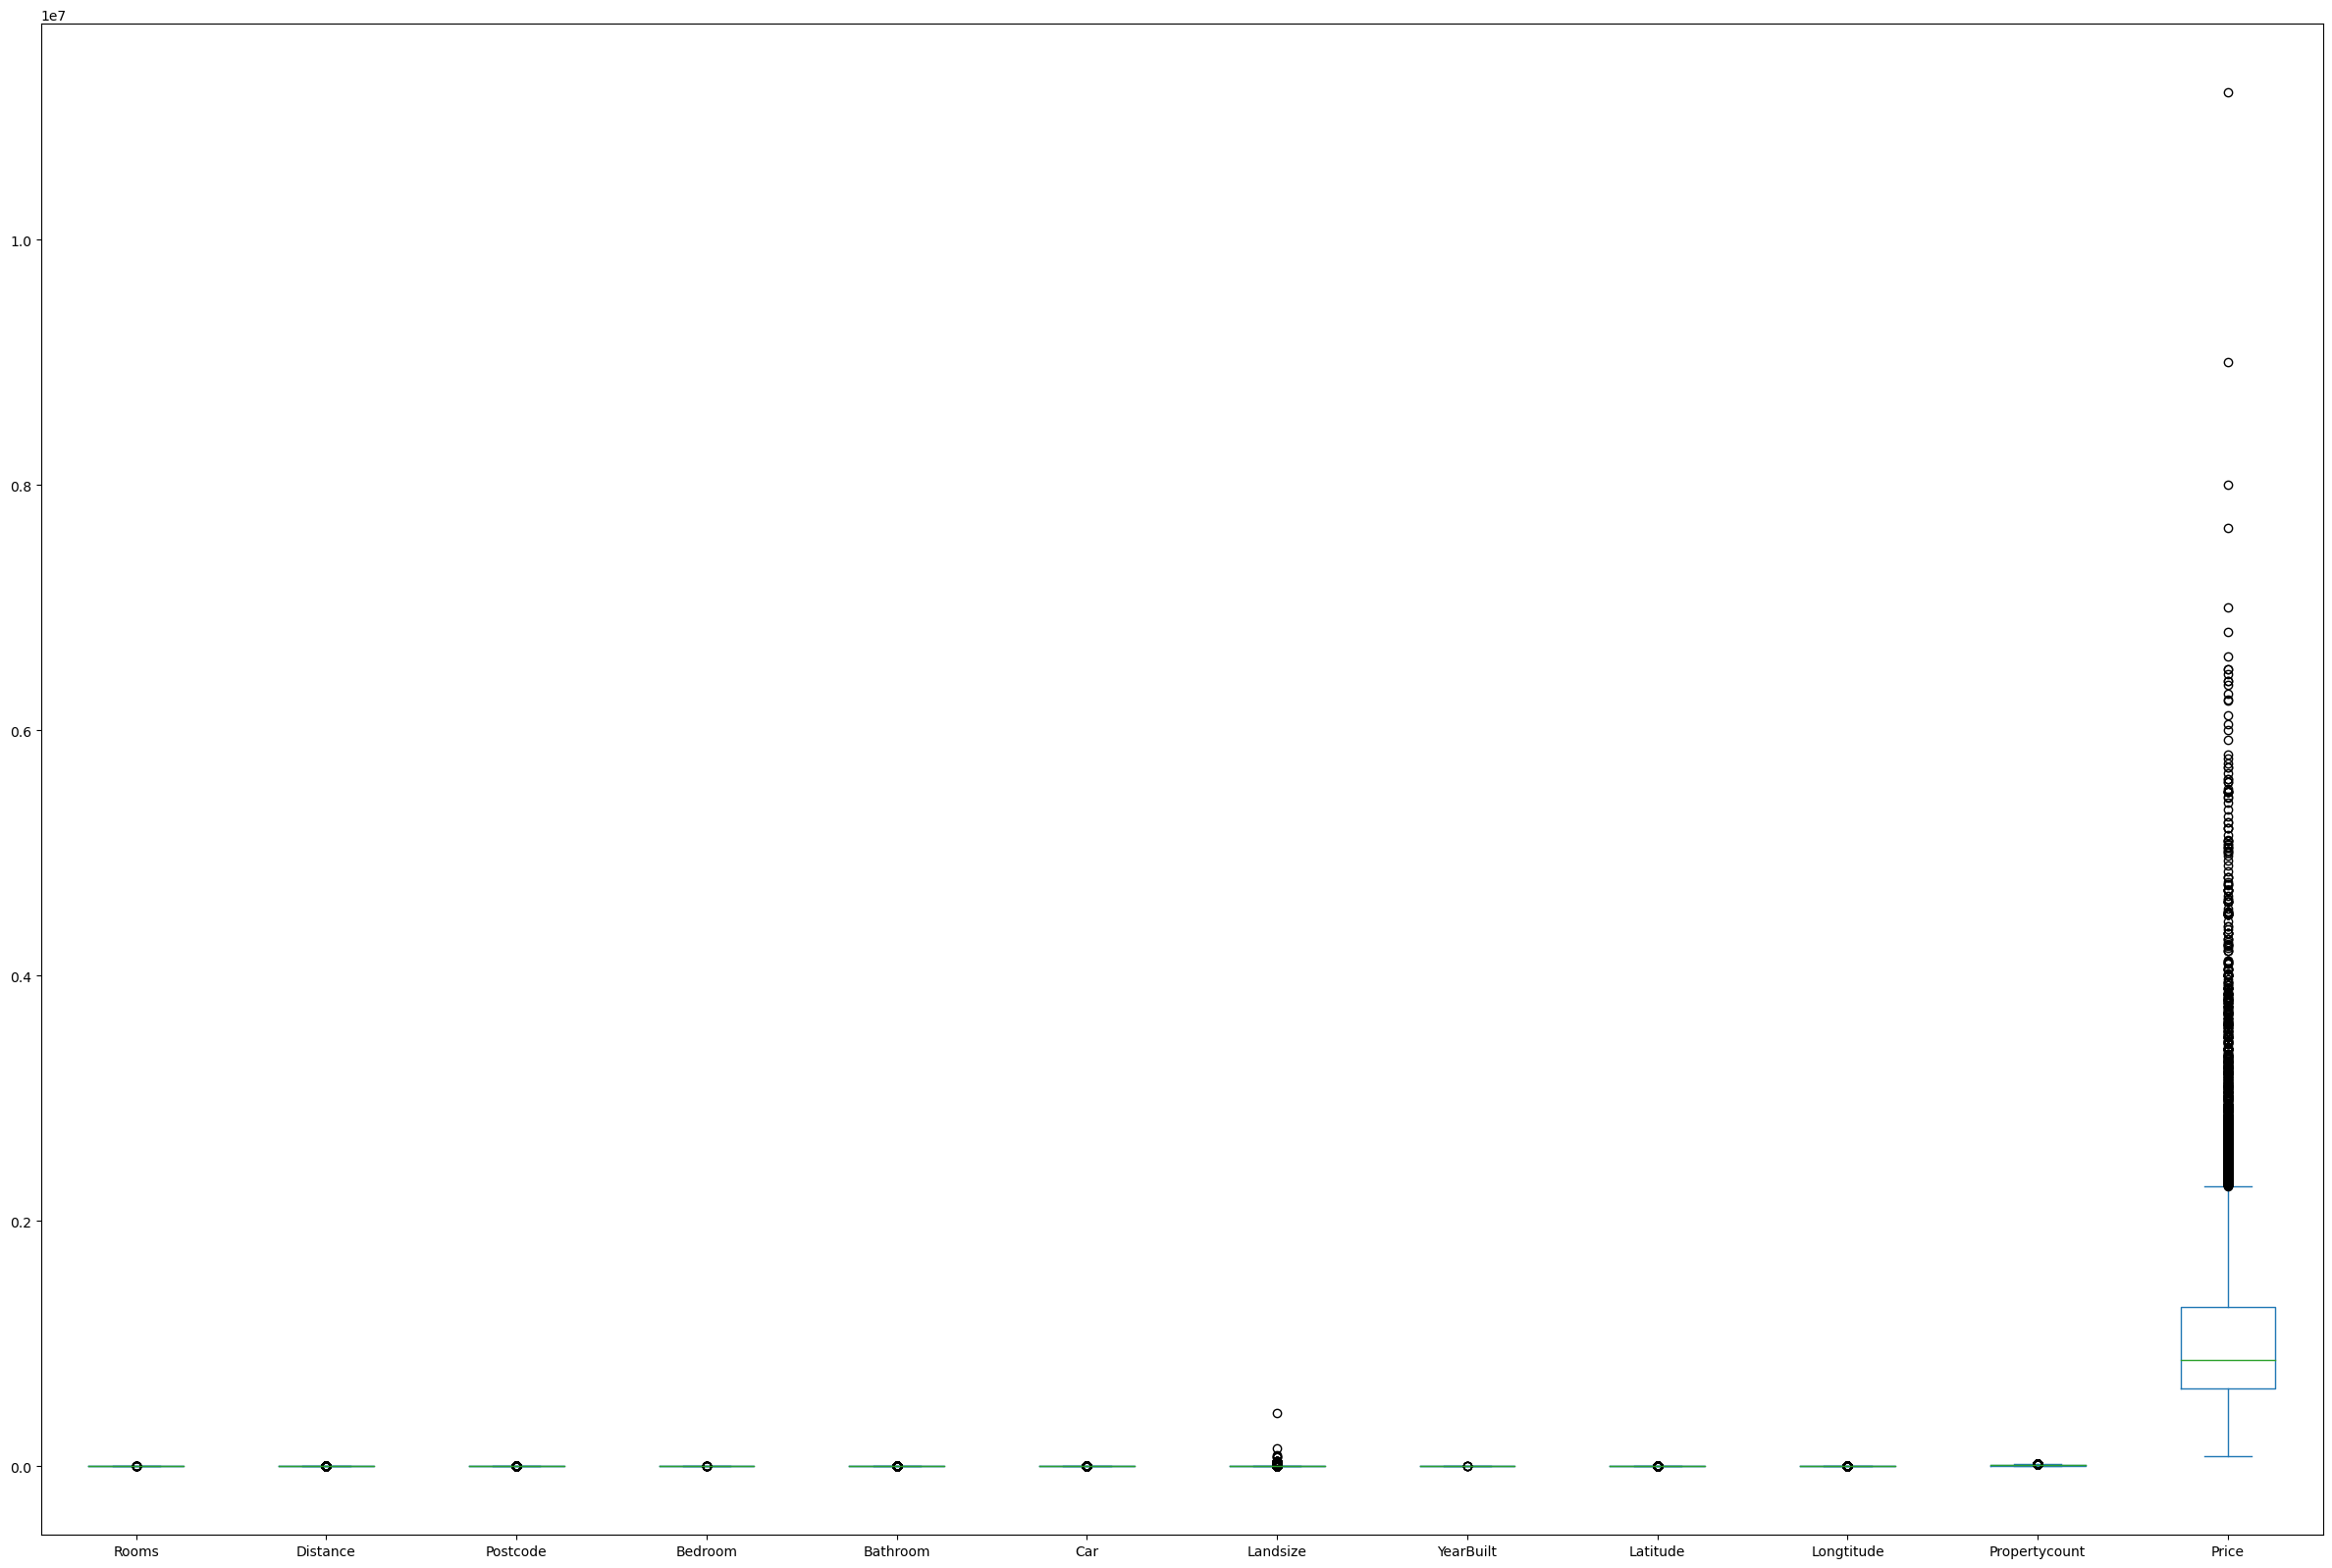

In [6]:
data.hist(bins=50, figsize=(30,20))
data.plot(kind='box', figsize=(30,20))
plt.show()

## • Explore relationships between features and the target variable using scatter plots and correlation matrices.


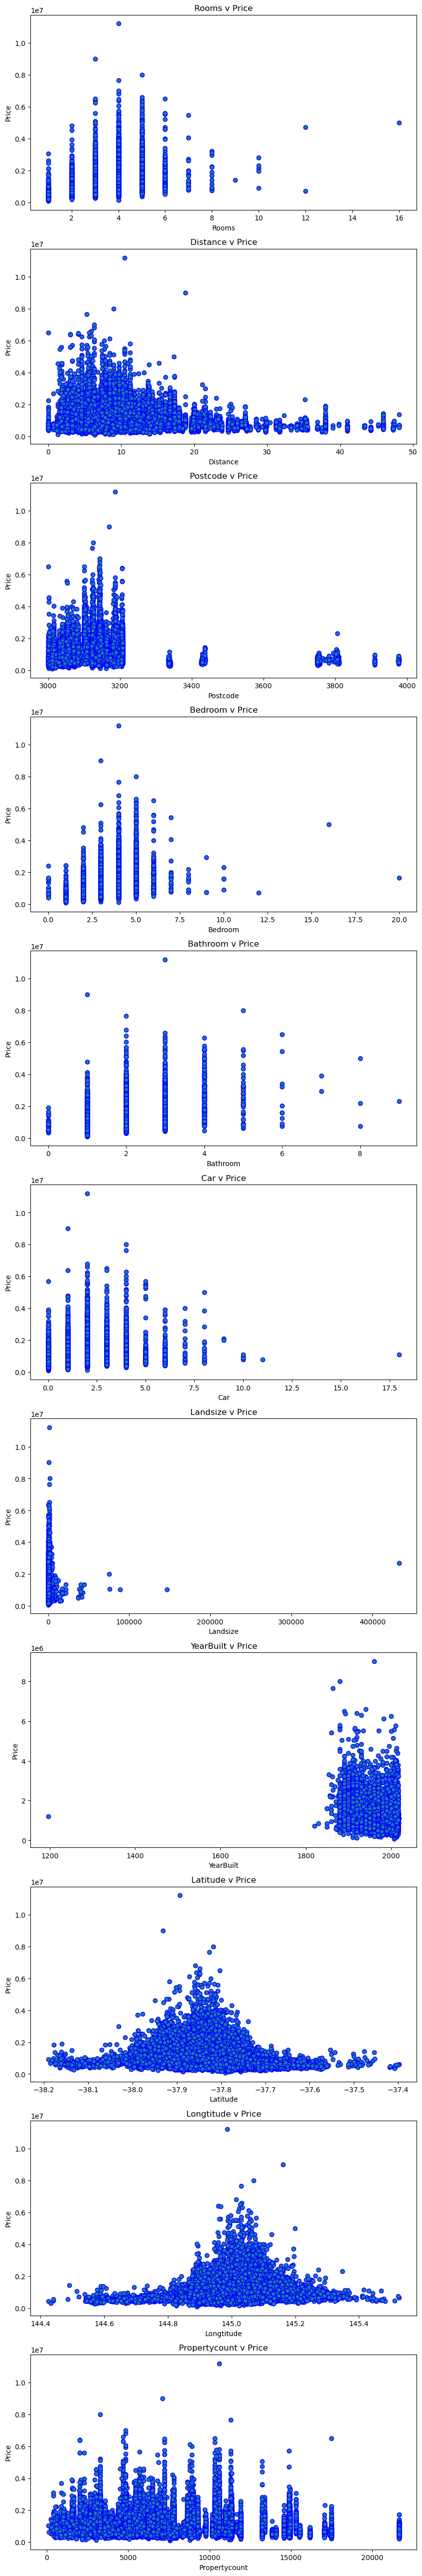

In [7]:
variables = ['Rooms', 'Distance', 'Postcode', 'Bedroom', 'Bathroom','Car', 'Landsize', 'YearBuilt', 'Latitude', 'Longtitude', 'Propertycount']

# Create a figure with subplots
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 6*len(variables)))

for i, var in enumerate(variables):
    axes[i].scatter(x=var, y='Price', data=data, edgecolor='b')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Price')
    axes[i].set_title(f'{var} v Price')

plt.show()

Text(0.5, 1.0, 'Correlation')

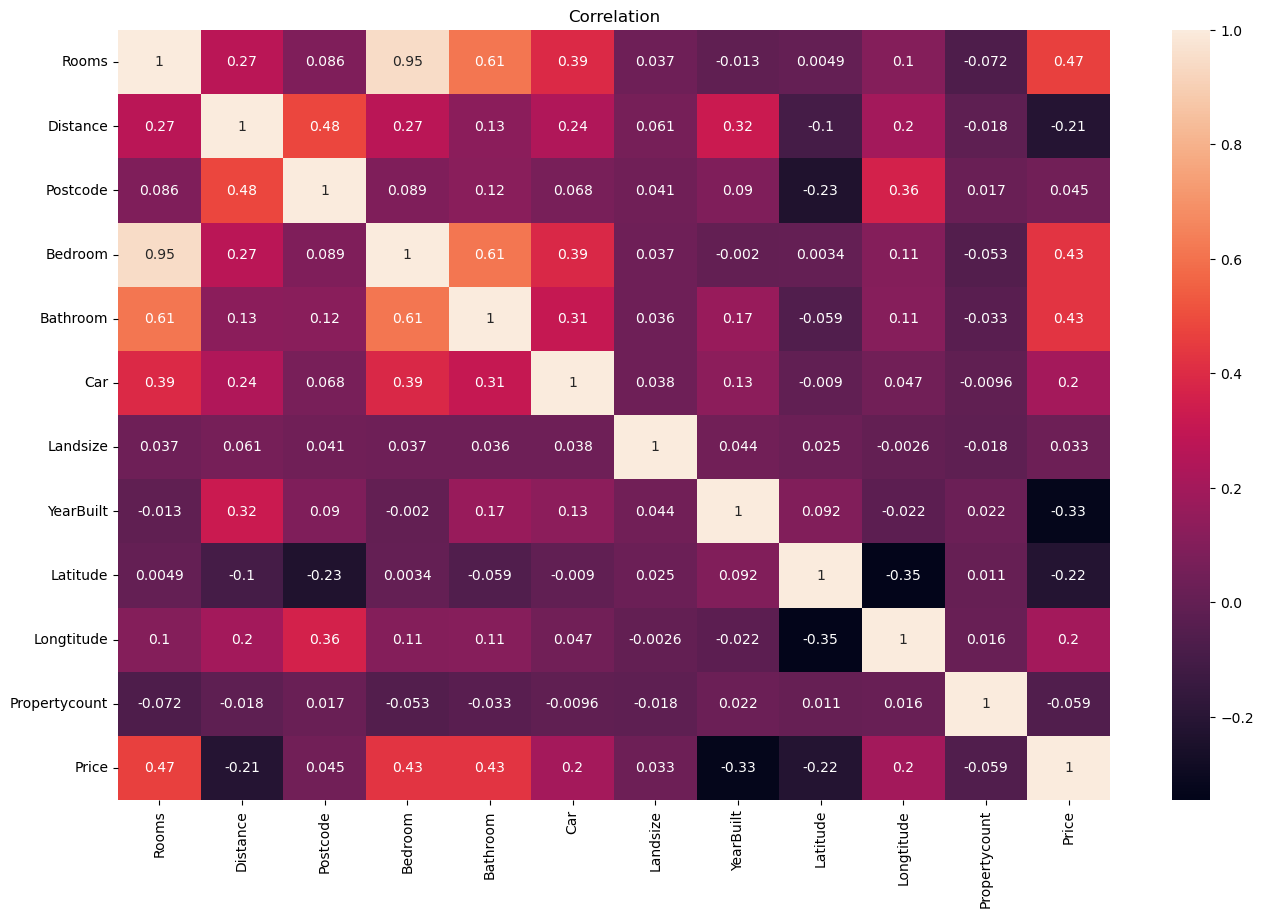

In [8]:
variables = ['Suburb', 'Date', 'Address', 'Type', 'Method', 'SellerG', 'BuildingArea', 'CouncilArea', 'Regionname', 'ParkingArea']
for var in variables:
    data[var] = data[var].astype('category')
plt.figure(figsize=(16, 10) )
sns.heatmap(data.select_dtypes(exclude=['category']).corr(), annot=True)
plt.title('Correlation')


In Conclusion, the Variable that has the highest effect on price is the amount of Rooms, followed by the Bedroom and Bathroom Count.

## • Examine categorical variables with bar plots and frequency tables.


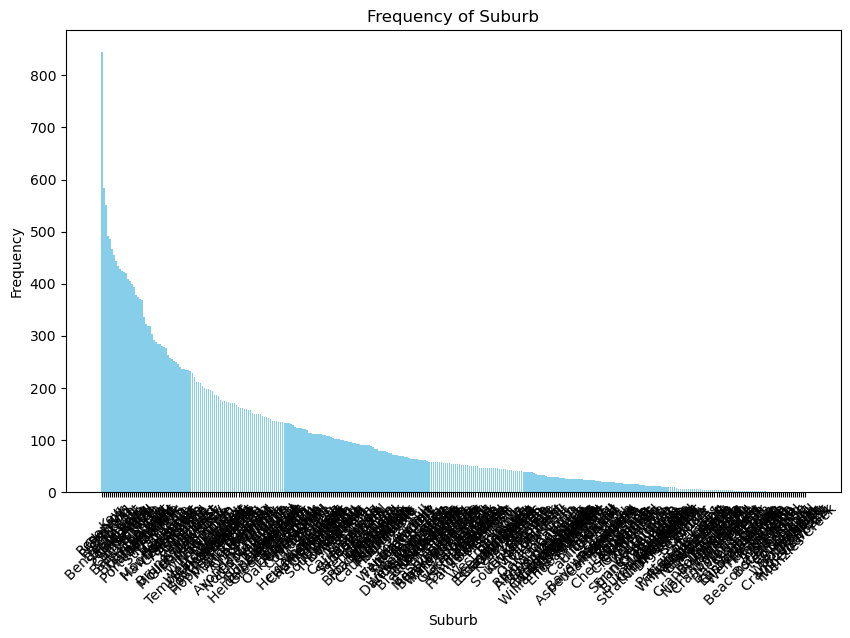

Suburb
Reservoir         844
Bentleigh East    583
Richmond          552
Glen Iris         491
Preston           485
                 ... 
Kalkallo            1
Menzies Creek       1
Monbulk             1
Olinda              1
viewbank            1
Name: count, Length: 351, dtype: int64


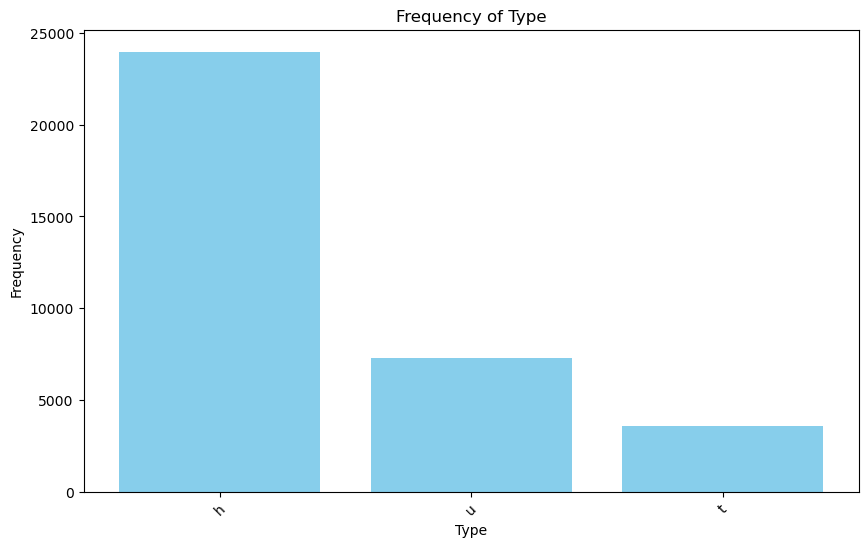

Type
h    23980
u     7297
t     3580
Name: count, dtype: int64


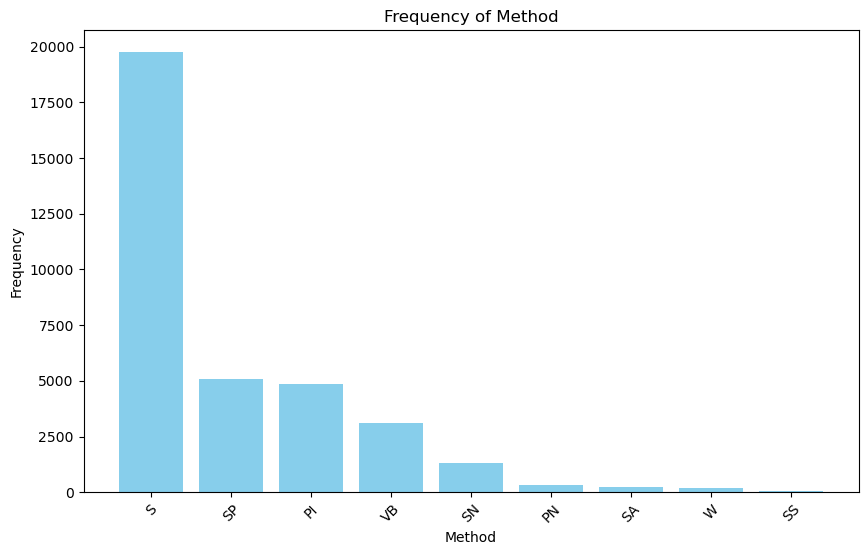

Method
S     19744
SP     5095
PI     4850
VB     3108
SN     1317
PN      308
SA      226
W       173
SS       36
Name: count, dtype: int64


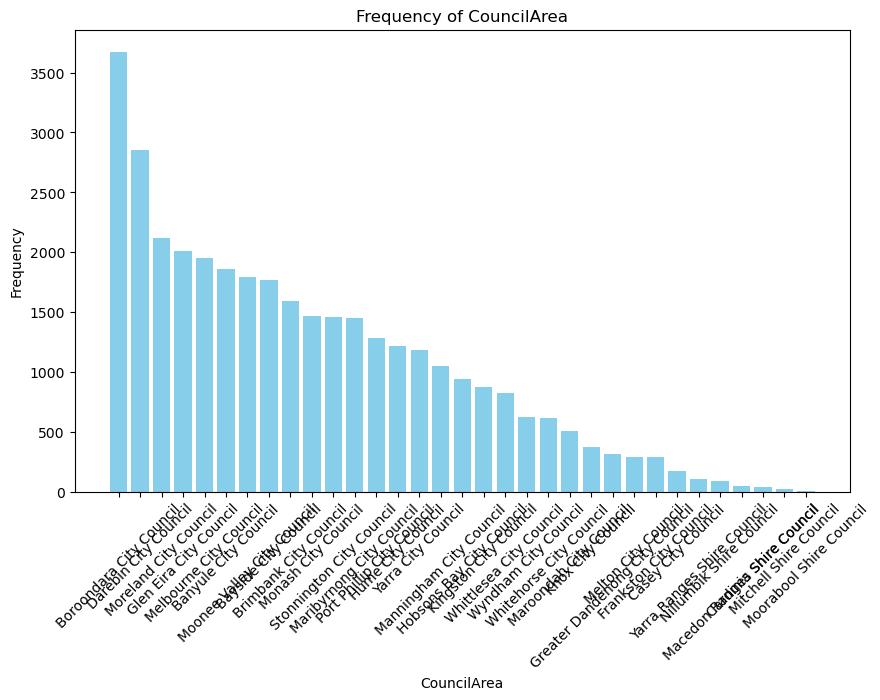

CouncilArea
Boroondara City Council           3675
Darebin City Council              2851
Moreland City Council             2122
Glen Eira City Council            2006
Melbourne City Council            1952
Banyule City Council              1861
Moonee Valley City Council        1791
Bayside City Council              1764
Brimbank City Council             1593
Monash City Council               1466
Stonnington City Council          1460
Maribyrnong City Council          1451
Port Phillip City Council         1280
Hume City Council                 1214
Yarra City Council                1186
Manningham City Council           1046
Hobsons Bay City Council           942
Kingston City Council              871
Whittlesea City Council            828
Wyndham City Council               624
Whitehorse City Council            618
Maroondah City Council             506
Knox City Council                  371
Greater Dandenong City Council     314
Melton City Council                292
Frankston Cit

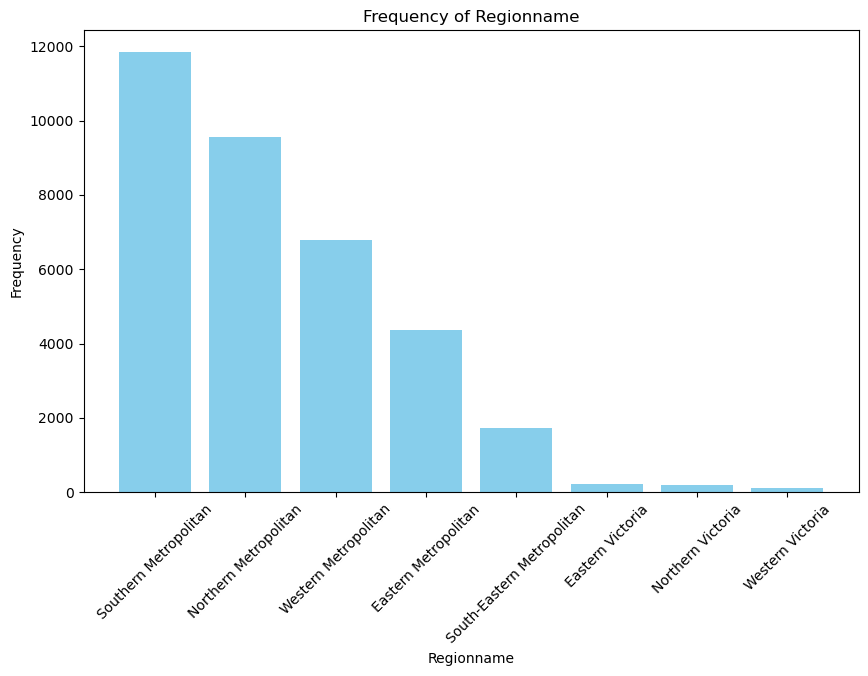

Regionname
Southern Metropolitan         11836
Northern Metropolitan          9560
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: count, dtype: int64


In [9]:
categorical_variables = ['Suburb', 'Type', 'Method', 'CouncilArea', 'Regionname']

# Loop through each categorical variable
for var in categorical_variables:
    # Frequency table
    frequency_table = data[var].value_counts()

    # Bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(frequency_table.index, frequency_table.values, color='skyblue')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {var}')
    plt.xticks(rotation=45)
    plt.show()

    # Display frequency table
    print(frequency_table)

Here we can see the most frequent categorical Variables

## • Identify potential outliers and discuss their impact on the dataset.


Some features that have outliers are: Price and Landsize, these can be seen in the BoxPlots above as the largest plots and are clearly affected by outliers.


Outliers can significantly affect measures like mean and standard deviation. The mean is particularly sensitive to outliers.
Outliers can also lead to skewed distributions, which may not accurately represent the underlying data. Outliers may also indicate data quality issues, such as errors in data entry.


# Feature Engineering (40 points):


## • Apply at least five feature engineering techniques to improve the dataset for modelingpurposes. Some ideas include:


In [10]:
num_cols = data.select_dtypes(include=["number"]).columns
cat_cols = data.select_dtypes(include=["category"]).columns

#To handle missing numerical data, we can use Mean/Median Imputation:
for num in num_cols:
    data[num].fillna(data[num].mean(), inplace=True)

# Encoding categorical variables with one-hot encoding
def encode_and_bind(data: pd.DataFrame, feature: str) -> None:
    dummies = pd.get_dummies(data[[feature]])
    res = pd.concat([data, dummies], axis=1)
    res = res.drop([feature], axis=1)
    return res

for cat in cat_cols:
    data = encode_and_bind(data, cat)

# Removing extreme values
for col in num_cols:
    z_scores = np.abs(stats.zscore(data[col]) )
    outliers = data[(z_scores > 3)]
    data = data.drop(outliers.index)

# Scaling numeric features using normalization
scaler = MinMaxScaler()

mask = (data == np.inf) | (data == -np.inf)
data = data[~mask.any(axis=1)]

data[num_cols] = scaler.fit_transform(data[num_cols])

# Creating an interaction feature
data["PriceLandsize"] = data["Landsize"] * data["Price"]


# Conclusion and Recommendations (10 points):


## • Summarize the key findings from the EDA and feature engineering processes.

###
EDA:
The dataset contains information about properties in Melbourne, including features like location, type of property, number of rooms, land size, building area, etc.
The data originally contains a lot of missing or NA values that can often change the outcome of graphs etc.
The main feature that has a big effect on Price is the no. of rooms.

FE:
It is rather easy to remove numerical values that are missing and fill them in with the medians of the columns.
Creating interaction features can be great for visualising effects of one feature on another.

Overall I believe that the Melbourne Housing Dataset is a great dataset to learn on and try out new things on as it features a lot of missing values and outliers that can be great for perfecting EDA and FE processes.